In [34]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score,precision_score,recall_score,classification_report,confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
import joblib

In [35]:
print('='*50)
print('STEP 1: DATA LOADING')
print('='*50)

STEP 1: DATA LOADING


In [36]:
#load dataset
df=pd.read_csv('iris.csv')

In [37]:
print('='*50)
print('STEP 2: DATA PREPROCESSING ')
print('='*50)

STEP 2: DATA PREPROCESSING 


In [38]:
print('Missing values before cleaning:')
print(df.isnull().sum())
#2 Remove unnecessary columns (id)
df= df.drop(columns=['Id'])
#3 Check for duplicates raws
print(f"\nNumber of duplicates:{df.duplicated().sum()}")
df=df.drop_duplicates()
#4 Verify datatypes
print("\nData types:")
print(df.dtypes)
#5 Check Outliers (using descriptive statistics)
print("\nDescriptive statistics:")
print(df.describe())
#6 Standertize species names (remove 'Iris-'prefix)
df['Species']=df['Species'].str.replace('Iris-','')
#7 Validate species categories
print("\nUnique Species Values:")
print(df['Species'].unique())
print("\nCleaned dataset head:")
print(df.head())

Missing values before cleaning:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Number of duplicates:1

Data types:
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

Descriptive statistics:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     149.000000    149.000000     149.000000    149.000000
mean        5.843624      3.059732       3.748993      1.194631
std         0.830851      0.436342       1.767791      0.762622
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.300000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

Unique Species Values:
['setosa' 'versicolor' 'virginica']

Cle

In [39]:
print('='*50)
print('STEP 3:TRAIN TEST SPLIT')
print('='*50)

STEP 3:TRAIN TEST SPLIT


In [40]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']
#stratified split preserves class distribution
X_train,X_test, y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print(f"Training set size:{X_train.shape[0]} Samples")
print(f"Test size set:{X_test.shape[0]} Samples")

Training set size:104 Samples
Test size set:45 Samples


In [41]:

print('='*50)
print('STEP 4:MODEL TRAINING')
print('='*50)

STEP 4:MODEL TRAINING



Training Decision Tree Classifier...


['Tree_classifier.sav']

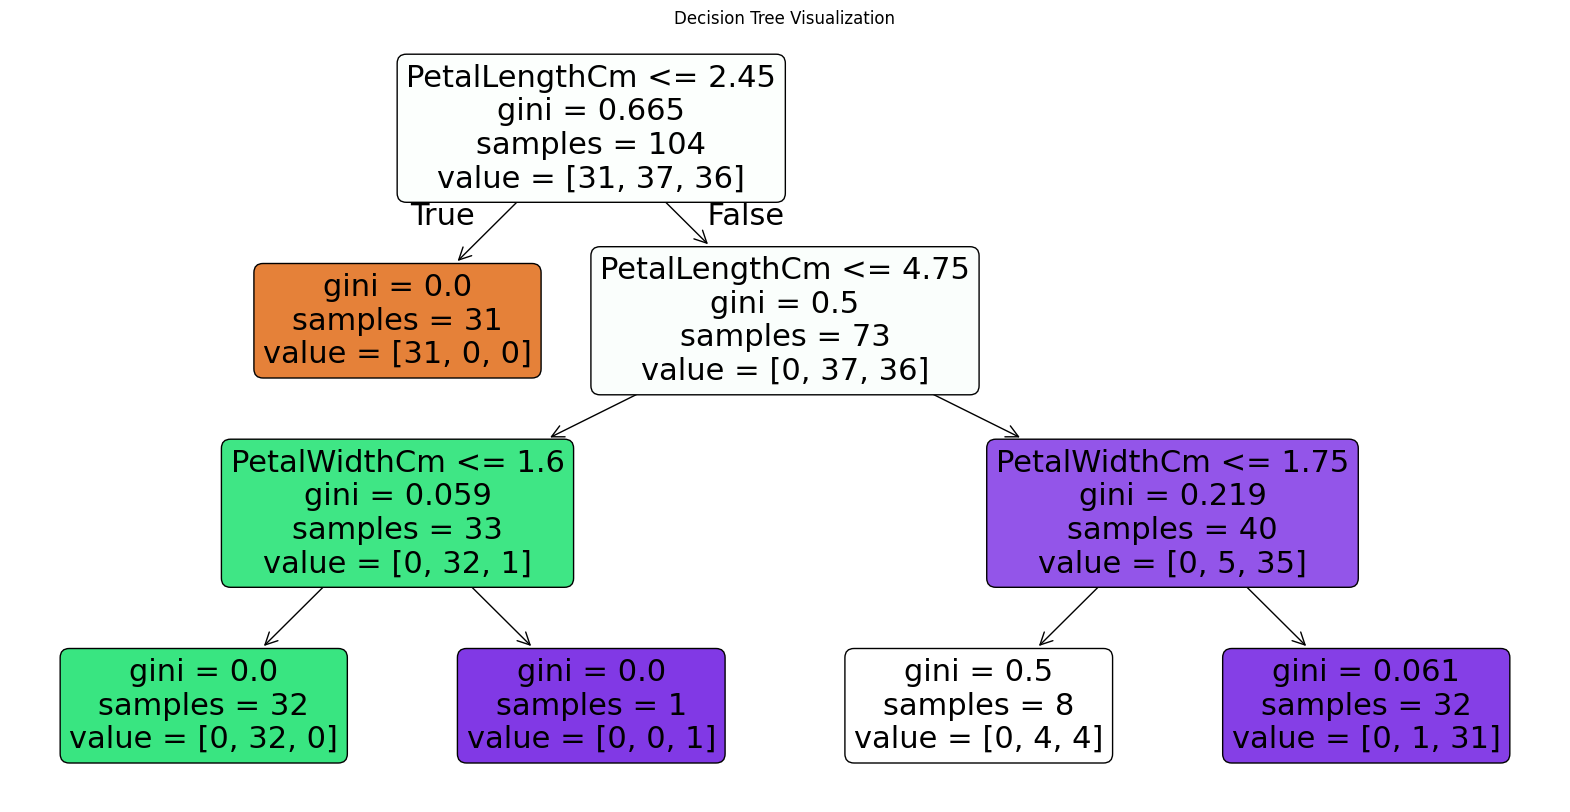

In [42]:
print("\nTraining Decision Tree Classifier...")
#Initialize model with hyperparameters
model =DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=2,random_state=42)
#Train Model
model.fit(X_train,y_train)
#Visualize Decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(model,feature_names=X.columns,filled=True,rounded=True)
plt.title("Decision Tree Visualization")
#plt.savefig('Decision_tree.png')
joblib.dump(model,'Tree_classifier.sav')

In [43]:
print('='*50)
print('STEP5:MODEL Evaluation')
print('='*50)

STEP5:MODEL Evaluation


Model Evaluation Performance...

Performance Metrics:
Accuracy:1.0000
Precision:1.0000
Recall:1.0000

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Text(70.72222222222221, 0.5, 'Actual')

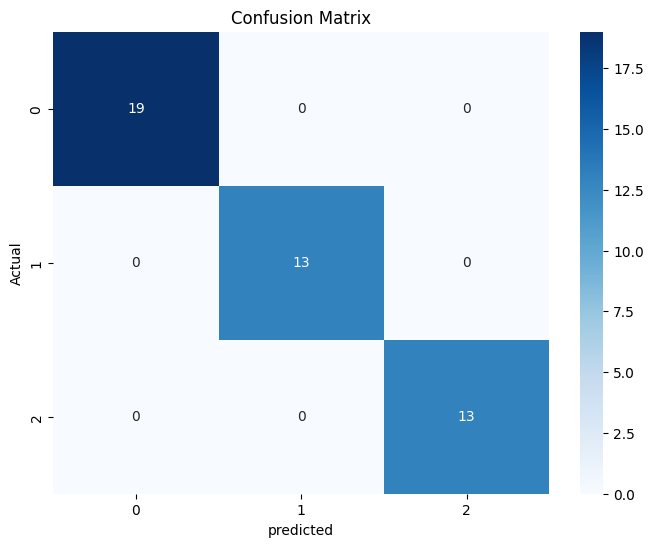

In [44]:

print("Model Evaluation Performance...")
#Make Predictions
y_pred=model.predict(X_test)
accuracy= accuracy_score (y_test,y_pred)
precision=precision_score(y_test,y_pred,average='weighted')
recall=recall_score(y_test,y_pred,average='weighted')
print("\nPerformance Metrics:")
print(f"Accuracy:{accuracy:.4f}")
print(f"Precision:{precision:.4f}")
print(f"Recall:{recall:.4f}")
#Detailed classfication report
print("\nClassification Report:")
print(classification_report(y_test,y_pred))
#Confusion Matrix
conf_matrix=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel("predicted")
plt.ylabel('Actual')
#plt.savefig('Confusion_matrix.png')


 feature importance analysis...

Feature Importance:
         Feature  Importance
2  PetalLengthCm    0.924808
3   PetalWidthCm    0.075192
1   SepalWidthCm    0.000000
0  SepalLengthCm    0.000000


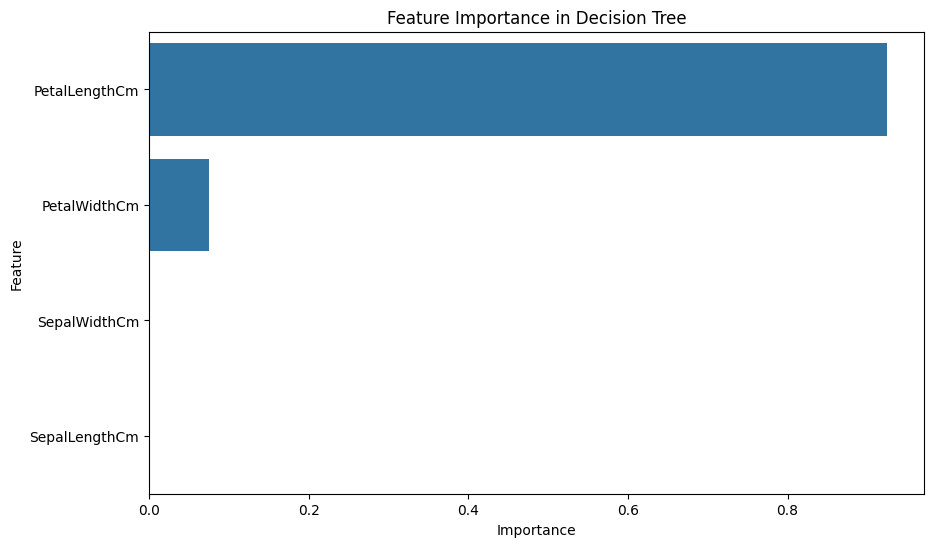

In [45]:
#featureimportances
print("\n feature importance analysis...")
feature_importance=pd.DataFrame({'Feature':X.columns, 'Importance':model.feature_importances_}).sort_values('Importance'
,ascending=False)
print("\nFeature Importance:")
print(feature_importance)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature',data=feature_importance,legend=False)
plt.title("Feature Importance in Decision Tree")
plt.savefig('Feature_importaces.png')